In [1]:
import matplotlib
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pandas as pd
import numpy as np
import os
from collections import defaultdict
from dateutil.parser import parse
from datetime import timedelta

In [5]:
results_dir = "results/delay"

results = []
for d in os.listdir(results_dir):
    if d.startswith("image"):
        for f in os.listdir(f"{results_dir}/{d}"):
            if f.endswith("json") and f.startswith("PodStartupLatency"):
                results.append((f"{d}/{f}", f"{d}/config.json"))

df = pd.DataFrame()
for (r, config) in results:
    print(r)
    with open(f"{results_dir}/{config}", "r") as c:
        with open(f"{results_dir}/{r}") as r:
            
            config_json = json.loads(c.read())
            results_json = json.loads(r.read())
            
            rows_json = defaultdict(list)

            for item in results_json["dataItems"]:
                name = item["labels"]["Metric"]
                data = item["raw"]
                if isinstance(data, list):
                    rows_json["metric"] += [name for _ in range(len(data))]

                    starts = [parse(d["start"]) for d in data]
                    start = min(starts)
                    rows_json["start"] += [parse(d["start"]) - start for d in data]
                    rows_json["start_ms"] += [(parse(d["start"])- start) / timedelta(milliseconds=1)  for d in data]

                    rows_json["end"] += [parse(d["end"]) - start for d in data]
                    rows_json["end_ms"] += [(parse(d["end"]) - start) / timedelta(milliseconds=1) for d in data]

                    rows_json["measurement"] += [(parse(d["end"]) - parse(d["start"])) / timedelta(milliseconds=1) for d in data]

                for k, v in config_json.items():
                    rows_json[k] = [v for _ in range(len(rows_json["metric"]))]

                d = pd.DataFrame(rows_json)
                df = df.append(d, ignore_index=True)

image=etcd,masters=5,delay=10,repeat=4/PodStartupLatency_PodStartupLatency_test_2022-05-14T00:58:20+01:00.json
image=mergeable-etcd,masters=3,delay=10,repeat=1/PodStartupLatency_PodStartupLatency_test_2022-05-14T14:05:37+01:00.json
image=etcd,masters=3,delay=5,repeat=2/PodStartupLatency_PodStartupLatency_test_2022-05-13T21:50:24+01:00.json
image=etcd,masters=3,delay=40,repeat=5/PodStartupLatency_PodStartupLatency_test_2022-05-13T23:10:17+01:00.json
image=mergeable-etcd,masters=1,delay=0,repeat=2/PodStartupLatency_PodStartupLatency_test_2022-05-14T10:29:59+01:00.json
image=etcd,masters=5,delay=0,repeat=5/PodStartupLatency_PodStartupLatency_test_2022-05-13T23:43:13+01:00.json
image=etcd,masters=5,delay=10,repeat=3/PodStartupLatency_PodStartupLatency_test_2022-05-14T00:52:08+01:00.json
image=etcd,masters=3,delay=40,repeat=4/PodStartupLatency_PodStartupLatency_test_2022-05-13T23:02:45+01:00.json
image=etcd,masters=5,delay=5,repeat=5/PodStartupLatency_PodStartupLatency_test_2022-05-14T00:33

In [6]:
df.describe()

,start,start_ms,end,end_ms,measurement,masters,delay,repeat
count,134625,134625.000000,134625,134625.000000,134625.000000,134625.000000,134625.000000,134625.000000
mean,0 days 00:00:11.770652683,11770.652683,0 days 00:00:13.809764710,13809.764711,2039.112027,3.382396,11.841411,2.955766
std,0 days 00:00:10.061955096,10061.955096,0 days 00:00:10.447880264,10447.880264,3741.795581,1.375947,13.916172,1.429088
min,0 days 00:00:00,0.000000,0 days 00:00:00,0.000000,-384.801000,1.000000,0.000000,1.000000
25%,0 days 00:00:03.650068,3650.068000,0 days 00:00:05.666673,5666.673000,0.000000,3.000000,0.000000,2.000000
50%,0 days 00:00:10.009517,10009.517000,0 days 00:00:12.464919,12464.919000,669.338000,3.000000,5.000000,3.000000
75%,0 days 00:00:17.541597,17541.597000,0 days 00:00:19.735969,19735.969000,2037.792000,5.000000,20.000000,4.000000
max,0 days 00:01:13.440904,73440.904000,0 days 00:01:16.146380,76146.380000,56146.380000,5.000000,40.000000,5.000000


In [7]:
df.head()

,metric,start,start_ms,end,end_ms,measurement,image,masters,delay,repeat
0,client_initialized_to_client_containersready,0 days 00:00:24.574318,24574.318,0 days 00:00:25.165894,25165.894,591.576,etcd,5.0,10.0,4.0
1,client_initialized_to_client_containersready,0 days 00:00:22.884140,22884.140,0 days 00:00:23.668958,23668.958,784.818,etcd,5.0,10.0,4.0
2,client_initialized_to_client_containersready,0 days 00:00:24.867541,24867.541,0 days 00:00:25.677074,25677.074,809.533,etcd,5.0,10.0,4.0
3,client_initialized_to_client_containersready,0 days 00:00:18.318138,18318.138,0 days 00:00:19.142267,19142.267,824.129,etcd,5.0,10.0,4.0
4,client_initialized_to_client_containersready,0 days 00:00:20.823956,20823.956,0 days 00:00:21.658635,21658.635,834.679,etcd,5.0,10.0,4.0


In [8]:
master_counts = sorted(list(set(df["masters"])))
data_per_masters = [df[df["masters"] == i] for i in master_counts]

In [9]:
def stripbar(data, name):
    os.makedirs("plots", exist_ok=True)
    os.makedirs("plots/delay", exist_ok=True)
    delays = sorted(list(set(data.delay)))
    g = sns.FacetGrid(data, col="masters", row="image")
    np.random.seed(100)
    g.map(sns.stripplot, "delay", "measurement", order=delays)
    np.random.seed(100)
    g.map(sns.barplot, "delay", "measurement", alpha=0.2, order=delays)
    g.set(xlabel="Delay", ylabel="Duration (ms)")
    plt.savefig(f"plots/delay/{name}-bar.svg")
    plt.savefig(f"plots/delay/{name}-bar.pdf")
    plt.savefig(f"plots/delay/{name}-bar.jpg")
    plt.show()

    g = sns.FacetGrid(data, col="masters", row="image", hue="delay")
    g.map(sns.scatterplot, "start_ms", "measurement", alpha=0.7)
    g.set(xlabel="Time since start (ms)", ylabel="Duration (ms)")
    g.add_legend()
    plt.savefig(f"plots/delay/{name}-scatter.svg")
    plt.savefig(f"plots/delay/{name}-scatter.pdf")
    plt.savefig(f"plots/delay/{name}-scatter.jpg")
    plt.show() 

        
#         g = sns.FacetGrid(data[data.image == image], col="masters", hue="delay")
#         g.map(sns.lineplot, "start_ms", "measurement")
#         g.set(xlabel="Time since start (ms)", ylabel="Duration (ms)")
#         g.add_legend()
#         plt.show()

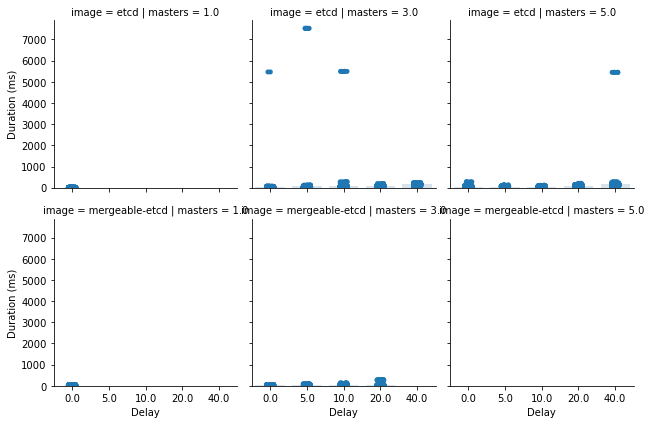

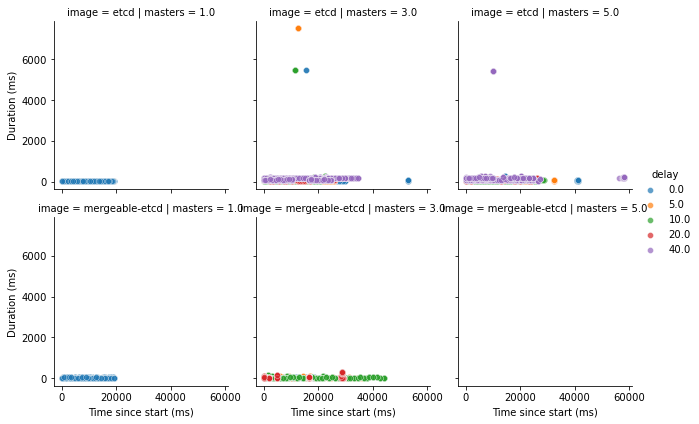

In [10]:
# time for scheduler to get watch event, process it and write back
data = df[np.isin(df.metric, ["client_create_to_client_schedule"])]
stripbar(data, "scheduling_time")

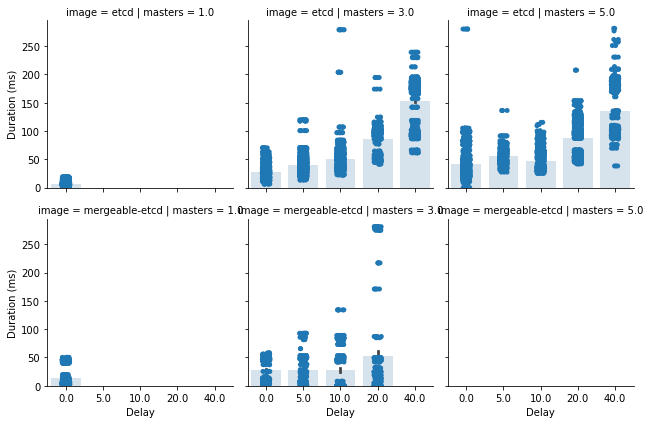

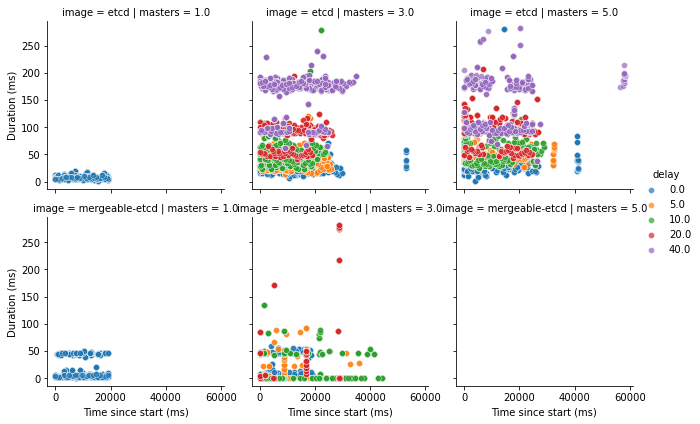

In [11]:
# time for scheduler to get watch event, process it and write back
data = df[np.isin(df.metric, ["client_create_to_client_schedule"])]
data = data[data.measurement < 500] # cut off outliers
stripbar(data, "scheduling_time_500")

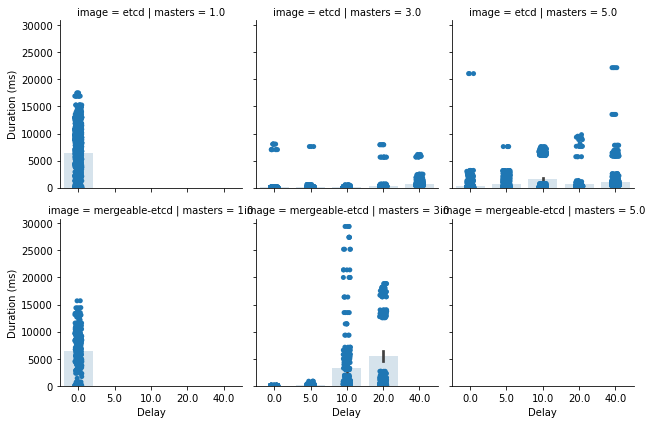

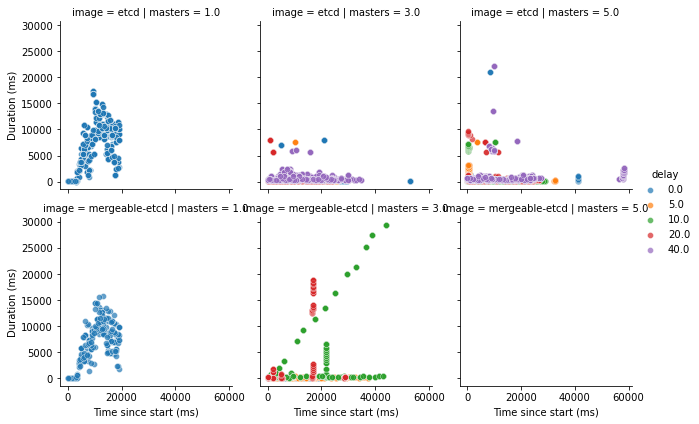

In [12]:
# time for watch to be sent to kubelet and picked up
data = df[np.isin(df.metric, ["client_schedule_to_client_started"])]
stripbar(data, "kubelet_pickup")

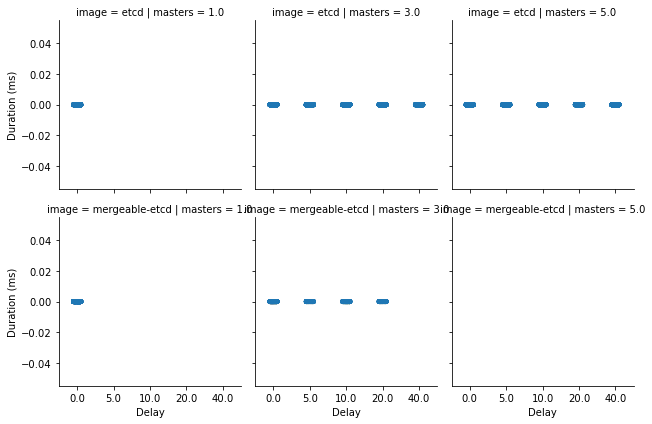

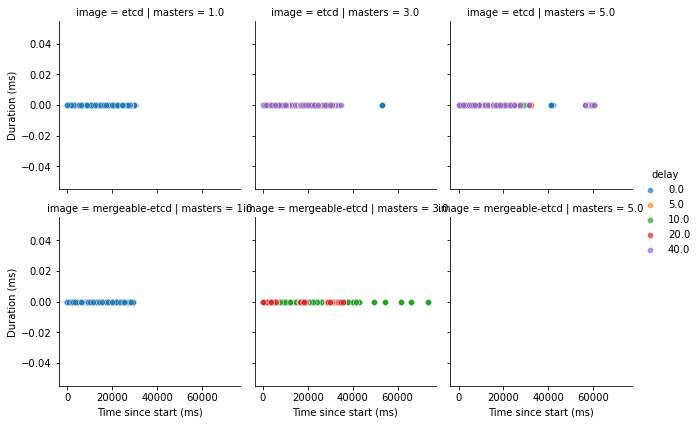

In [13]:
data = df[np.isin(df.metric, ["client_started_to_client_initialized"])]
stripbar(data, "initialize")

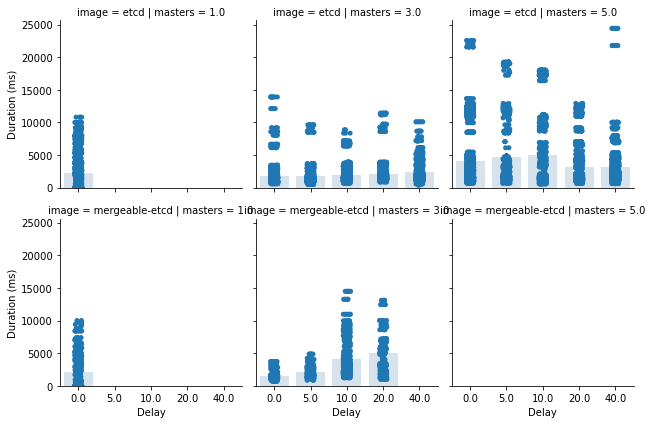

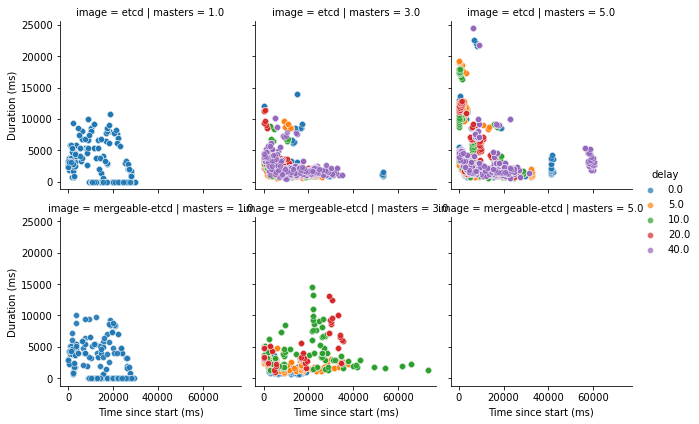

In [14]:
data = df[np.isin(df.metric, ["client_initialized_to_client_containersready"])]
stripbar(data, "container_start")

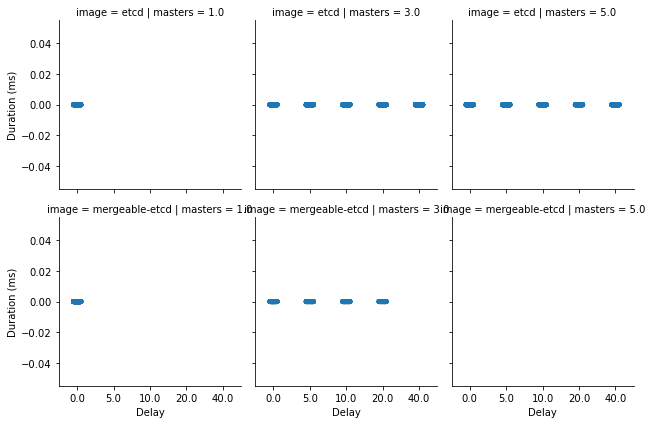

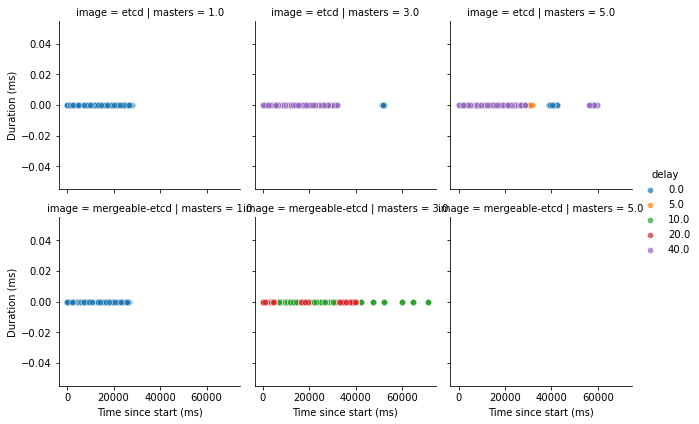

In [15]:
data = df[np.isin(df.metric, ["client_containersready_to_client_podready"])]
stripbar(data, "pod_ready")

,start,start_ms,end,end_ms,measurement,masters,delay,repeat
count,5848,5848.000000,5848,5848.000000,5848.000000,5848.000000,5848.0,5848.000000
mean,0 days 00:00:09.983840088,9983.840089,0 days 00:00:10.004644572,10004.644572,20.804484,2.319767,0.0,2.879275
std,0 days 00:00:07.916482079,7916.482079,0 days 00:00:07.915103142,7915.103142,20.920445,1.563766,0.0,1.345979
min,0 days 00:00:00,0.000000,0 days 00:00:00.001752,1.752000,0.003000,1.000000,0.0,1.000000
25%,0 days 00:00:03.527007,3527.007000,0 days 00:00:03.543705,3543.705000,5.432000,1.000000,0.0,2.000000
50%,0 days 00:00:09.106226,9106.226000,0 days 00:00:09.124287,9124.287000,12.392000,1.000000,0.0,3.000000
75%,0 days 00:00:15.042442,15042.442000,0 days 00:00:15.049573,15049.573000,31.654000,3.000000,0.0,4.000000
max,0 days 00:00:53.095564,53095.564000,0 days 00:00:53.124776,53124.776000,280.229000,5.000000,0.0,5.000000


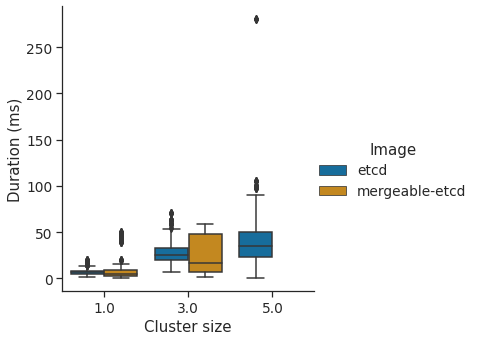

In [21]:
# time for scheduler to get watch event, process it and write back
data = df[np.isin(df.metric, ["client_create_to_client_schedule"])]
data = data[data.measurement < 1000] # cut off outliers
data = data[data.delay == 0]
display(data.describe())
data = data.sort_values("image")
data = data.rename(columns={"image": "Image", "masters": "Cluster size"})

name = "scheduling_delay_perfect"

os.makedirs("plots", exist_ok=True)
os.makedirs("plots/delay", exist_ok=True)
delays = sorted(list(set(data.delay)))
np.random.seed(100)
# sns.stripplot(data=data, x="masters", y="measurement", hue="image", dodge=True)
np.random.seed(100)
# sns.barplot(data=data, x="masters", y="measurement", alpha=0.2, hue="image")

sns.set_palette("colorblind")
sns.set_style("ticks")

ax = sns.catplot(kind="box", data=data, x="Cluster size", y="measurement", hue="Image")

ax.set(xlabel="Cluster size", ylabel="Duration (ms)")

plt.savefig(f"plots/delay/{name}-box.svg")
plt.savefig(f"plots/delay/{name}-box.pdf")
plt.savefig(f"plots/delay/{name}-box.jpg")
plt.show()

                           start      start_ms                        end  \
count                      14008  14008.000000                      14008   
mean   0 days 00:00:11.238193127  11238.193128  0 days 00:00:11.292381625   
std    0 days 00:00:08.818359498   8818.359499  0 days 00:00:08.823066351   
min              0 days 00:00:00      0.000000            0 days 00:00:00   
25%       0 days 00:00:03.806422   3806.422000     0 days 00:00:03.955969   
50%       0 days 00:00:10.026745  10026.745000     0 days 00:00:10.055995   
75%       0 days 00:00:17.036542  17036.542000     0 days 00:00:17.071178   
max       0 days 00:00:58.190675  58190.675000     0 days 00:00:58.385588   

             end_ms   measurement       masters         delay        repeat  
count  14008.000000  14008.000000  14008.000000  14008.000000  14008.000000  
mean   11292.381625     54.188497      3.143775     10.688892      2.934252  
std     8823.066352     52.439410      1.431385     13.649432      1.381

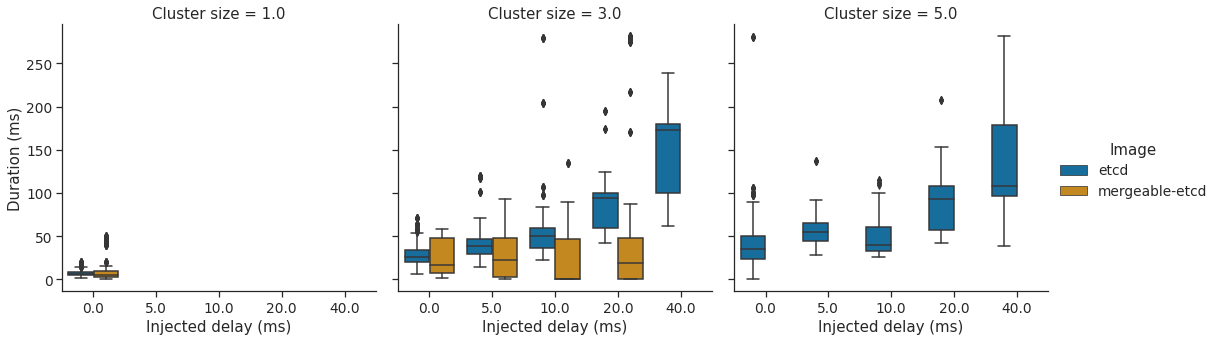

In [17]:
# time for scheduler to get watch event, process it and write back
data = df[np.isin(df.metric, ["client_create_to_client_schedule"])]
data = data[data.measurement < 5000] # cut off outliers
print(data.describe())
data = data.sort_values("image")
data = data.rename(columns={"image": "Image", "masters": "Cluster size"})

name = "scheduling_delay"

sns.set(font_scale=1.25)
sns.set_style("ticks")

os.makedirs("plots", exist_ok=True)
os.makedirs("plots/delay", exist_ok=True)
delays = sorted(list(set(data.delay)))
np.random.seed(100)
# sns.stripplot(data=data, x="masters", y="measurement", hue="image", dodge=True)
np.random.seed(100)
# sns.barplot(data=data, x="masters", y="measurement", alpha=0.2, hue="image")

sns.set_palette("colorblind")

ax = sns.catplot(kind="box", data=data, x="delay", y="measurement", hue="Image", col="Cluster size")

ax.set(xlabel="Injected delay (ms)", ylabel="Duration (ms)")

plt.savefig(f"plots/delay/{name}-box.svg")
plt.savefig(f"plots/delay/{name}-box.pdf")
plt.savefig(f"plots/delay/{name}-box.jpg")
plt.show()